In [1]:
import pandas as pd

In [2]:
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [6]:
!pip install webdriver-manager

In [7]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|█████████████████| 8.15M/8.15M [00:01<00:00, 6.97MB/s]
/var/folders/5c/71x1kg_d11s18jn53d09b2sr0000gp/T/ipykernel_19777/2160715986.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [9]:
data=[]

with driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://www.youtube.com/watch?v=fCK8-2pdtFU&t=4066s")

    for item in range(200): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
        data.append(comment.text)

In [47]:
df = pd.DataFrame(data)

In [48]:
df['1']  = 'Jack'

In [49]:
df.loc[50:, '1'] = 'Captain'
df['2'] = 'Sparrow'

In [50]:
df.unstack()

0  0      KR\nSKIP NAVIGATION\nSIGN IN\n#pirates #pirate...
   1      #pirates #piratesofthecaribbean #jacksparrow\n...
   2      There's something here that is difficult to de...
   3      I am a Pirates of the Caribbean fan since I'm ...
   4      Davey Jones, and Calypso's story is the only p...
                                ...                        
2  122                                              Sparrow
   123                                              Sparrow
   124                                              Sparrow
   125                                              Sparrow
   126                                              Sparrow
Length: 381, dtype: object

In [59]:
new_df = pd.concat([df[0], df['1'], df['2']])

In [74]:
text = ' '.join(a for a in new_df)
text = text.replace('year', '')

In [75]:
text = text.replace('ago', '')

In [88]:
text = text.replace('views', '')
text = text.replace('REPLY', '')

In [89]:
from wordcloud import WordCloud

In [101]:
word = WordCloud(width = 700, height = 600, background_color = 'white', collocations = False)

In [91]:
import matplotlib.pyplot as plt

In [103]:
image = word.generate(text)

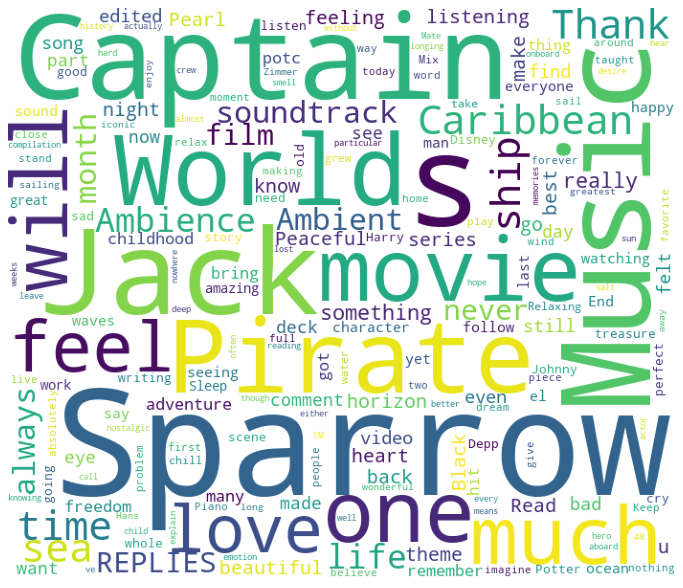

In [104]:
plt.figure(figsize = (12,18))
plt.imshow(image)
plt.axis('off');